In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
column_names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel',
    'width_of_kernel', 'asymmetry_coeff', 'length_of_groove', 'class_label'
]
df.columns = column_names
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_groove,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


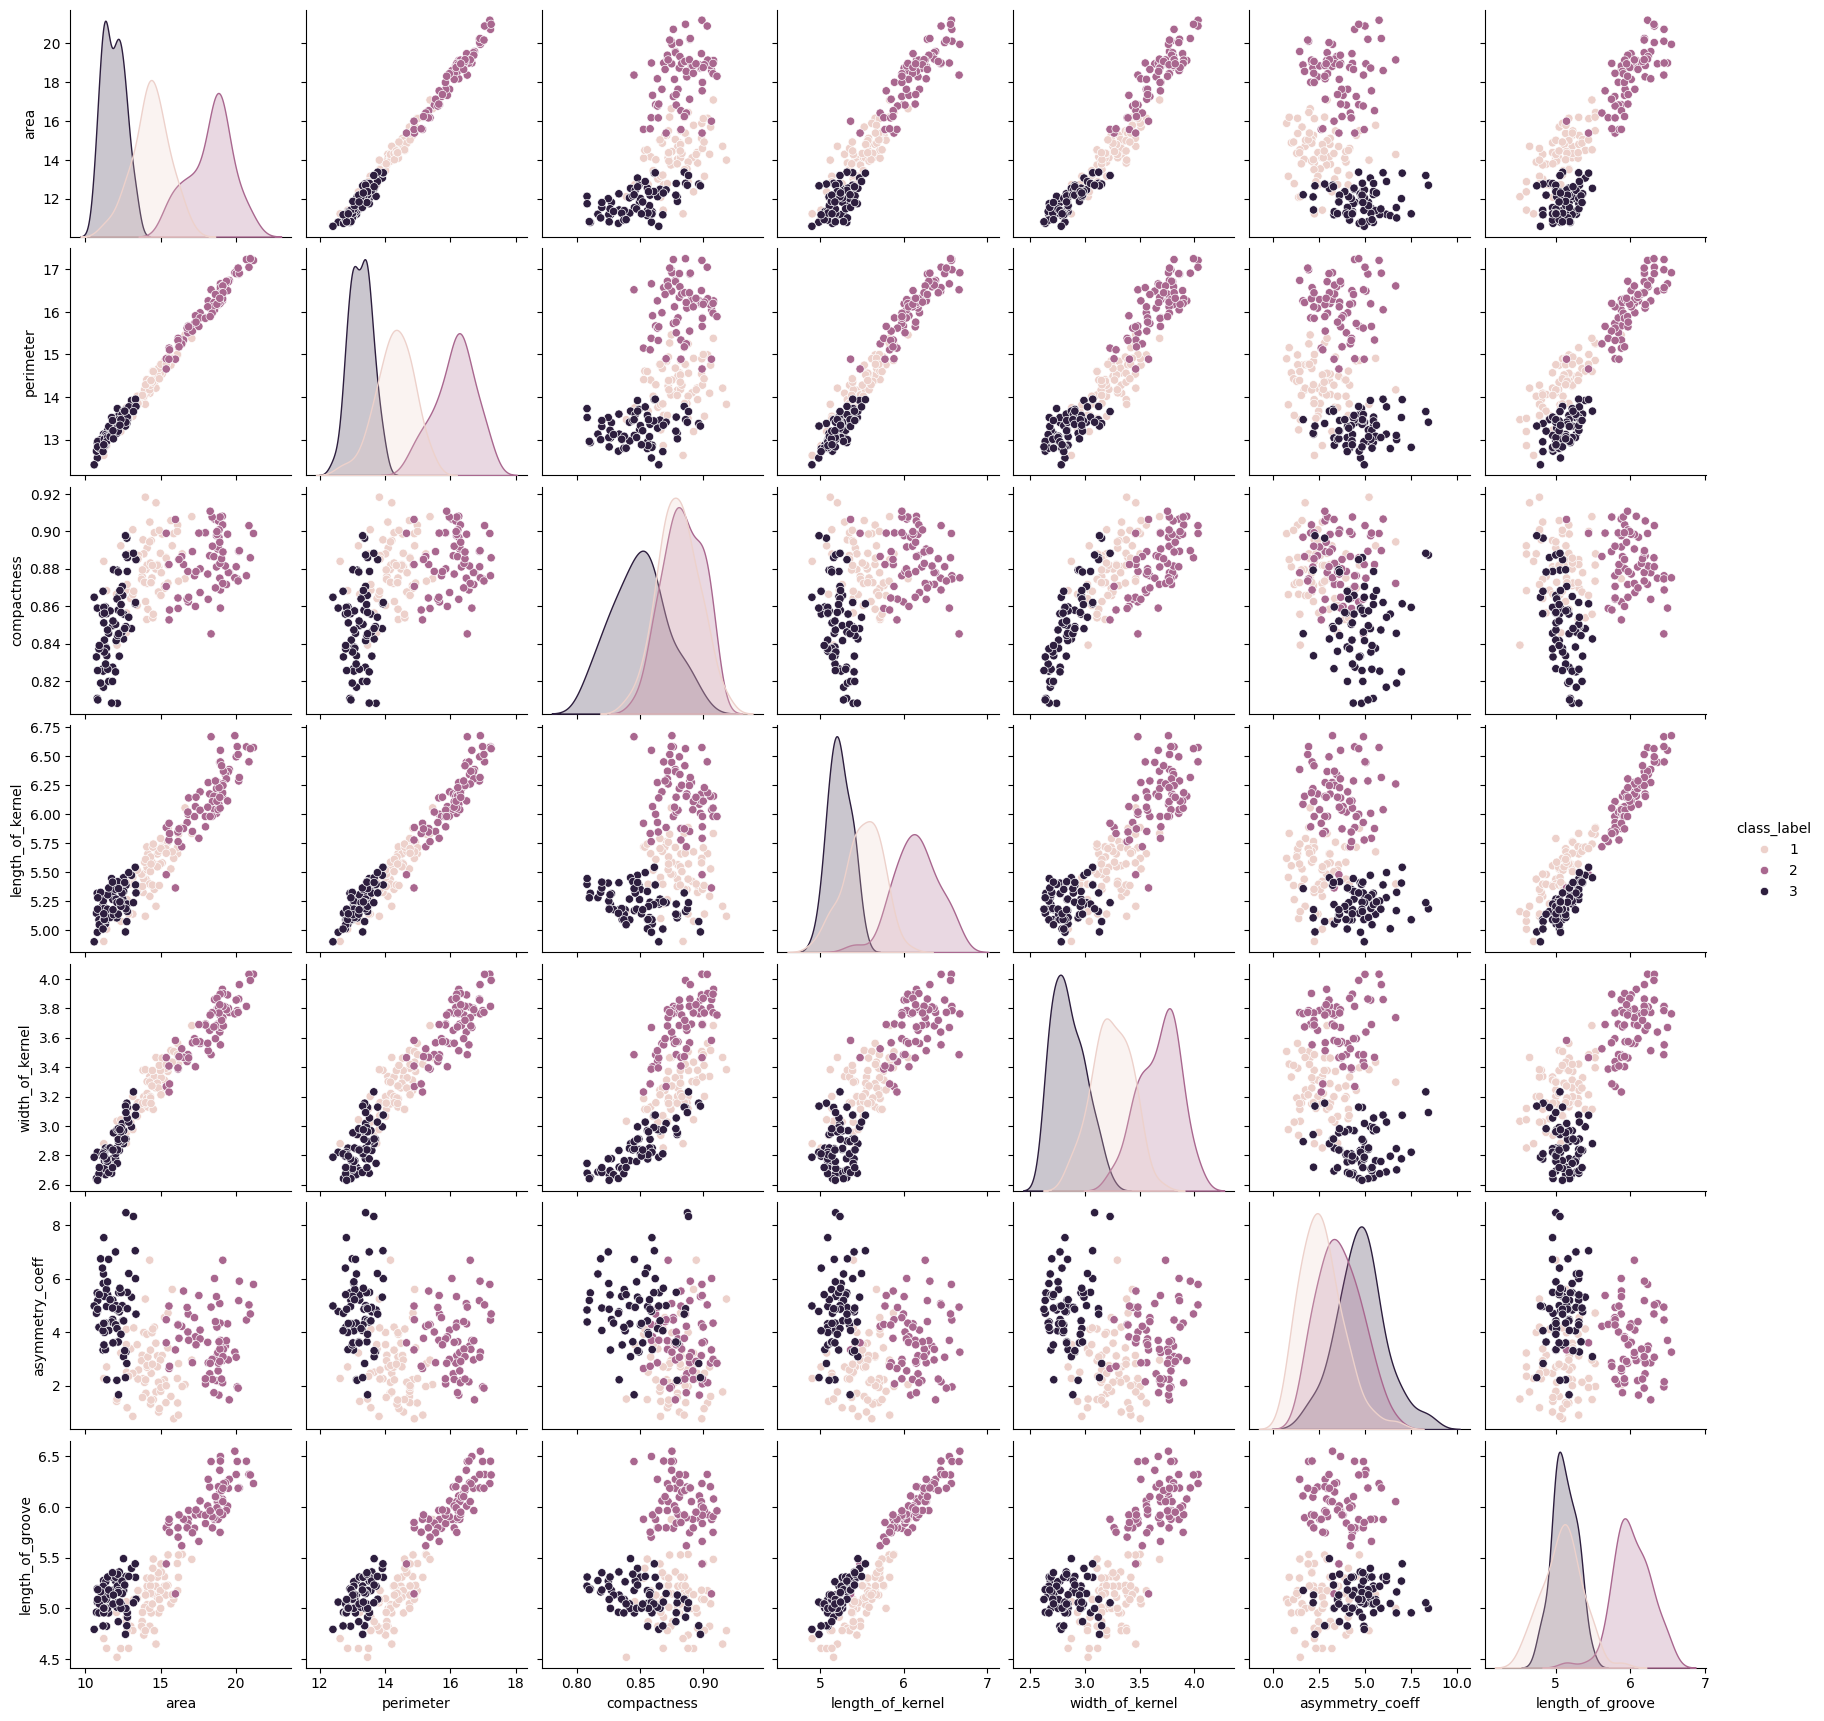

In [94]:
sns.pairplot(df, hue='class_label', diag_kind='kde')

In [47]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


In [52]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

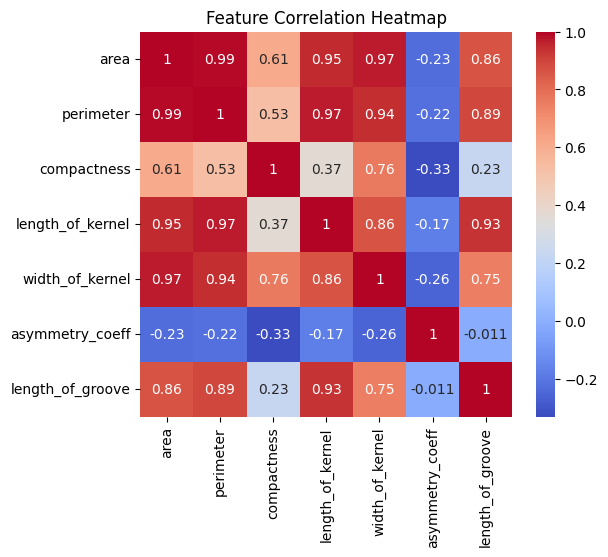

In [78]:
import seaborn as sns
x = df.iloc[:, :-1]
plt.figure(figsize=(6,5))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# Using random forest as it handels correlated and non linear data well.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[1 1]
 [2 1]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [2 1]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [1 1]
 [2 1]
 [3 3]
 [1 1]]


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 4 12  0]
 [ 0  0 13]]


0.9047619047619048

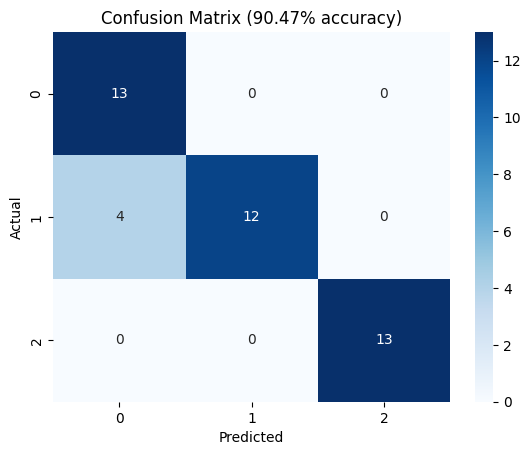

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (90.47% accuracy)')
plt.show()

# Clustering

Elbow method

Text(0, 0.5, 'WCSS')

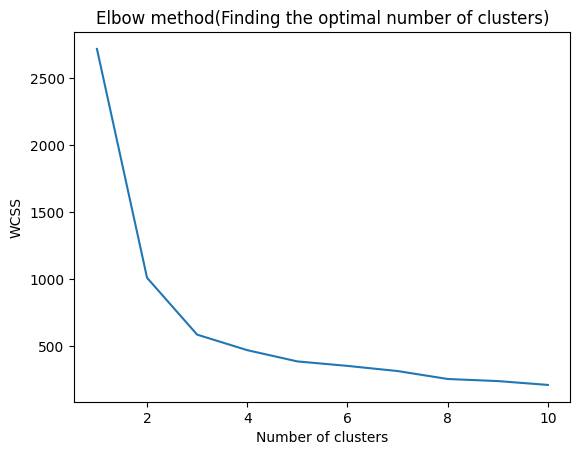

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow method(Finding the optimal number of clusters)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

3 clusters seem to be opimal as expected.

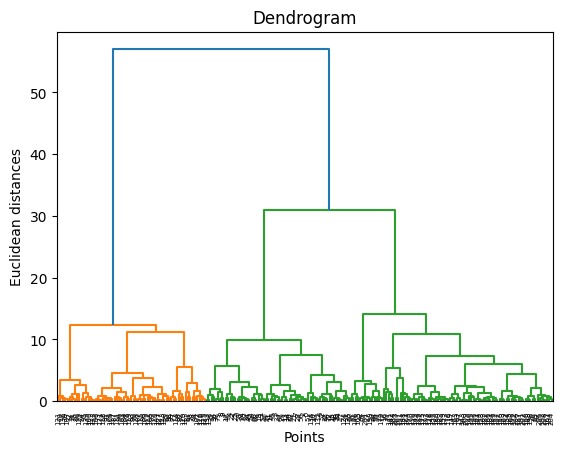

In [98]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel('Points')
plt.ylabel('Euclidean distances')
plt.show()